<a href="https://colab.research.google.com/github/melvin-mango/Phishing-site-detection/blob/main/W%26B_Phishing_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression to determine whether websites are legitimate or phished websites.

- We will use the urlset.csv dataset
- The model we will use is logistic regression for classification.

#Installing and intergrating into Weights and Biases Platform

In [ ]:
!pip install wandb

In [ ]:
import wandb

In [ ]:
!wandb login

wandb: Currently logged in as: melvinlewisusiu (melvinlewisusiu-usiu). Use `wandb login --relogin` to force relogin


In [ ]:
wandb.init(project="Phishing-Logistic-Regression")

wandb: Currently logged in as: melvinlewisusiu (melvinlewisusiu-usiu). Use `wandb login --relogin` to force relogin


In [ ]:
config = wandb.config
config.learning_rate = 0.01
config.epochs = 10

#Importing necessary libraries and the urlset dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('urlset.csv', encoding='latin-1', on_bad_lines='skip')
df.head()

<ipython-input-245-4b6023cd206f>:1: DtypeWarning: Columns (1,2,3,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('urlset.csv', encoding='latin-1', on_bad_lines='skip')


,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1.0,0.0,18.0,107.611111,107.277778,0.0,0.0,0.0,0.0,0.8,0.795729,1.0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0.0,0.0,11.0,150.636364,152.272727,0.0,0.0,0.0,0.0,0,0.768577,1.0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0.0,0.0,14.0,73.500000,72.642857,0.0,0.0,0.0,0.0,0,0.726582,1.0
3,mail.printakid.com/www.online.americanexpress....,10000000,0.0,0.0,6.0,562.000000,590.666667,0.0,0.0,0.0,0.0,0,0.85964,1.0
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0.0,0.0,8.0,29.000000,24.125000,0.0,0.0,0.0,0.0,0,0.748971,1.0


#Data Visualisation

In [ ]:
df.shape

(96005, 14)

In [ ]:
df.sample(50)

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
38102,rahjooianemehr.com/confirmation/confirmation/2...,10000000,0.0,0.0,7.0,78.142857,77.285714,0.000000,0.000000,0.000000,0.000000,0,0.819398,1.0
90554,www.uschess.org/tla/,147339,0.0,1.0,1.0,23.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.375,0.0
41873,9d345009-a-62cb3a1a-s-sites.googlegroups.com/s...,4570,1.0,1.0,21.0,71.333333,69.904762,0.004651,0.004065,0.002663,0.002037,0.571429,0.818516,1.0
85918,gate.crashing.org/doc/ppc/doc003.htm,10000000,1.0,0.0,3.0,31.666667,21.000000,0.009804,0.014286,0.009901,0.014493,0.875,0.533981,0.0
77933,www.zope.org/Products/DCOracle,266607,1.0,0.0,2.0,50.500000,52.500000,0.000000,0.000000,0.000000,0.000000,0.882353,0.791304,0.0
64575,www.ecommercetimes.com/perl/story/3895.html,62530,0.0,0.0,3.0,118.333333,121.666667,0.000000,0.000000,0.000000,0.000000,0,0.795511,0.0
37946,affiliatealmanac.com/systembanking/dce72118f12...,10000000,0.0,0.0,2.0,229.500000,255.000000,0.000000,0.000000,0.000000,0.000000,0,0.804469,1.0
44832,www776.paypal.ca.37150.securessl-810.mx/js/web...,10000000,0.0,0.0,6.0,95.333333,92.666667,0.000000,0.000000,0.000000,0.000000,0,0.681073,1.0
81911,www.copernic.com/en/products/desktop-search/,65587,1.0,0.0,3.0,148.333333,154.666667,0.011086,0.010638,0.004454,0.004274,0.545455,0.782353,0.0
91865,www.freewebs.com/duluthbridge/,5001,1.0,1.0,2.0,50.500000,55.000000,0.000000,0.000000,0.000000,0.000000,0.37037,0.661417,0.0


#Checking for missing values

In [ ]:
df.isnull().sum()

domain            0
ranking          52
mld_res          70
mld.ps_res       81
card_rem         82
ratio_Rrem       82
ratio_Arem       82
jaccard_RR       83
jaccard_RA       84
jaccard_AR       85
jaccard_AA       86
jaccard_ARrd     86
jaccard_ARrem    88
label            92
dtype: int64

#Splitting of data into two
- We drop the column 'domain' in order to remain with columns of numerical values
- The label(y) column will be our target variable and the X will be the remaining columns combined

In [ ]:
X = df.drop(columns=['label','domain'])
y = df['label']

In [ ]:
X

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem
0,10000000,1.0,0.0,18.0,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.8,0.795729
1,10000000,0.0,0.0,11.0,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0,0.768577
2,10000000,0.0,0.0,14.0,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0,0.726582
3,10000000,0.0,0.0,6.0,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0,0.85964
4,10000000,0.0,0.0,8.0,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0,0.748971
...,...,...,...,...,...,...,...,...,...,...,...,...
96000,339,1.0,1.0,2.0,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.45098,0.846906
96001,63029,1.0,0.0,3.0,114.000000,128.333333,0.002899,0.002577,0.002907,0.002584,0.75,0.714623
96002,753,1.0,1.0,3.0,91.000000,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571
96003,6,1.0,1.0,4.0,682.000000,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323


In [ ]:
y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
96000    0.0
96001    0.0
96002    0.0
96003    0.0
96004    0.0
Name: label, Length: 96005, dtype: float64

#Dealing with missing values
- I decided to fill in the missing values with the mean of their columns
- The data set had some encoding issues in line 18000 to 19000 so I also skipped them since they were not that much to affect the model

In [ ]:
# Convert relevant columns in 'X' to numeric type if they contain numbers as strings
for col in X.columns:
    if X[col].dtype == 'object':  # Check if the column is of object type (often strings)
        try:
            X[col] = pd.to_numeric(X[col], errors='coerce')  # Convert to numeric, replace non-convertibles with NaN
        except:
            pass  # Skip if the column cannot be converted


X.fillna(X.mean(), inplace=True)  # Now calculate the mean and fill missing values
X.isnull().sum()

ranking          0
mld_res          0
mld.ps_res       0
card_rem         0
ratio_Rrem       0
ratio_Arem       0
jaccard_RR       0
jaccard_RA       0
jaccard_AR       0
jaccard_AA       0
jaccard_ARrd     0
jaccard_ARrem    0
dtype: int64

In [ ]:
# Convert relevant columns in 'y' to numeric type if they contain numbers as strings
for i in range(len(y)):
    if y.dtype == 'object':  # Check if the column is of object type (often strings)
        try:
            y.iloc[i] = pd.to_numeric(y.iloc[i], errors='coerce')  # Convert to numeric, replace non-convertibles with NaN
        except:
            pass  # Skip if the element cannot be converted

y.fillna(y.mean(), inplace=True)  # Now calculate the mean and fill missing values
y.isnull().sum()

0

<Axes: >

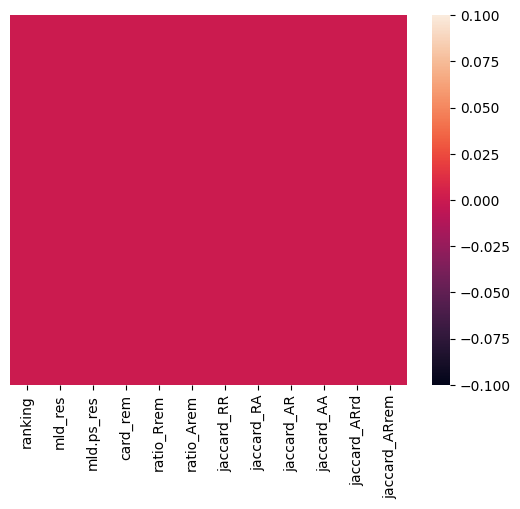

In [ ]:
sns.heatmap(X.isnull(),yticklabels=False,cbar=True,cmap='rocket')

<Axes: >

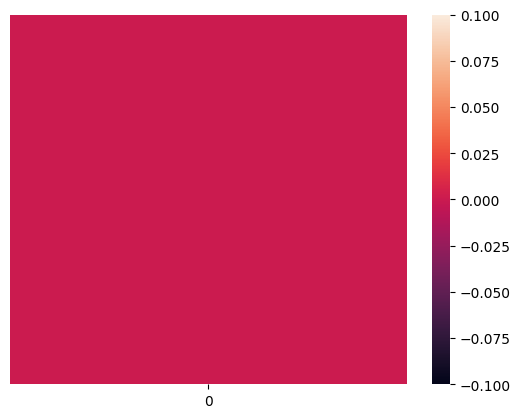

In [ ]:
sns.heatmap(y.isnull().values.reshape(-1, 1), yticklabels=False, cbar=True, cmap='rocket')
# Reshape y.isnull().values to a 2D array

In [ ]:
y=y.astype('int')

#Splitting into train and test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem
25581,10000000.0,0.0,0.0,9.0,177.888889,177.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.773156
27232,10000000.0,0.0,0.0,2.0,227.500000,235.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.844622
19936,6089.0,0.0,0.0,10.0,165.100000,164.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.773290
25399,10000000.0,0.0,0.0,1.0,13.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.785714
27965,10000000.0,0.0,0.0,1.0,31.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.647059
...,...,...,...,...,...,...,...,...,...,...,...,...
6265,10000000.0,1.0,1.0,5.0,99.000000,96.600000,0.000000,0.000000,0.000000,0.000000,0.785714,0.768535
54886,136672.0,0.0,0.0,1.0,111.000000,113.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.777778
76820,138945.0,1.0,0.0,1.0,24.000000,24.000000,0.027027,0.055556,0.033333,0.068966,0.500000,0.655172
860,10000000.0,0.0,0.0,7.0,40.142857,36.428571,0.000000,0.000000,0.000000,0.000000,0.000000,0.717949


In [ ]:
X_test

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem
88609,10000000.0,1.0,0.0,3.0,164.666667,179.666667,0.00000,0.001808,0.000000,0.001815,0.866667,0.750847
34507,10000000.0,0.0,0.0,5.0,87.400000,92.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.853306
53443,10000000.0,1.0,1.0,1.0,8.000000,7.000000,0.00000,0.000000,0.000000,0.000000,0.733333,0.500000
18455,10000000.0,0.0,0.0,10.0,151.300000,148.800000,0.00000,0.000000,0.000000,0.000000,0.000000,0.759086
58808,13648.0,1.0,0.0,3.0,105.666667,111.333333,0.00289,0.005525,0.002994,0.005714,0.600000,0.699739
...,...,...,...,...,...,...,...,...,...,...,...,...
70644,73087.0,1.0,1.0,1.0,537.000000,577.000000,0.01259,0.013445,0.005396,0.006723,0.846154,0.823241
47174,10000000.0,0.0,0.0,7.0,165.571429,164.571429,0.00000,0.000000,0.000000,0.000000,0.000000,0.812549
66208,14969.0,1.0,0.0,1.0,265.000000,268.000000,0.00000,0.000000,0.000000,0.000000,0.916667,0.850694
57370,6655.0,1.0,1.0,5.0,138.400000,152.400000,0.00000,0.002457,0.000000,0.002448,0.761905,0.764563


In [ ]:
y_train

25581    1
27232    1
19936    1
25399    1
27965    1
        ..
6265     1
54886    0
76820    0
860      1
15795    1
Name: label, Length: 76804, dtype: int64

In [ ]:
y_test

88609    0
34507    1
53443    0
18455    1
58808    0
        ..
70644    0
47174    1
66208    0
57370    0
56067    0
Name: label, Length: 19201, dtype: int64

#Building and training of model using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
for epoch in range(config.epochs):
  logmodel = LogisticRegression()

In [ ]:
print(y_train.value_counts())

label
0    38550
1    38254
Name: count, dtype: int64


In [ ]:
logmodel.fit(X_train,y_train)

LogisticRegression()

#Model Testing

In [ ]:
prediction= logmodel.predict(X_test)

In [ ]:
prediction

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
y_test

88609    0
34507    1
53443    0
18455    1
58808    0
        ..
70644    0
47174    1
66208    0
57370    0
56067    0
Name: label, Length: 19201, dtype: int64

#Model Performance Evaluation

In [ ]:
from sklearn.metrics import auc, accuracy_score,confusion_matrix

In [ ]:
print(classification_report(y_test,prediction))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9551
           1       0.50      1.00      0.67      9650

    accuracy                           0.50     19201
   macro avg       0.25      0.50      0.33     19201
weighted avg       0.25      0.50      0.34     19201



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Axes(0.125,0.11;0.62x0.77)


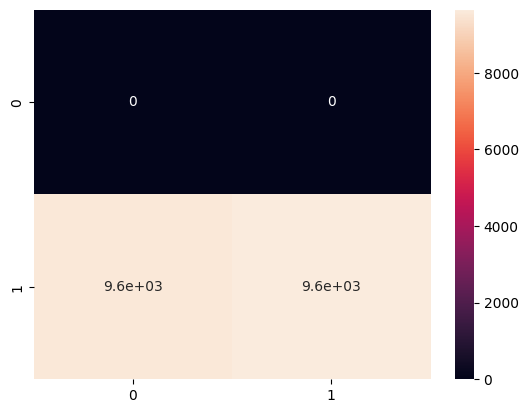

In [ ]:
print(sns.heatmap(confusion_matrix(prediction,y_test),annot=True))

In [ ]:
pip install scikit-plot

In [ ]:
import scikitplot as skplt

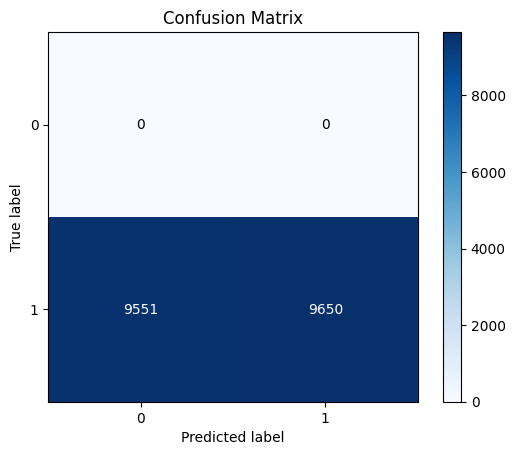

In [ ]:
skplt.metrics.plot_confusion_matrix(prediction,y_test)
plt.show()

In [ ]:
train_accuracy = accuracy_score(y_train, logmodel.predict(X_train))
test_accuracy = accuracy_score(y_test, prediction)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.49813811780636424
Test Accuracy: 0.5025779907296495


In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
test_auc = roc_auc_score(y_test, prediction)
print("Test AUC:", test_auc)

Test AUC: 0.5


In [ ]:
wandb.log({
        'epoch': epoch + 1,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'test_auc': test_auc
    })

In [ ]:
wandb.finish()

epoch,▁
test_accuracy,▁
test_auc,▁
train_accuracy,▁
epoch,10
test_accuracy,0.50258
test_auc,0.5
train_accuracy,0.49814
